In [55]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [56]:
import pandas as pd
df = pd.read_csv('/Users/isaacshareef/Desktop/Python_Code/Jupyter_notebook/EDR/All EDR')

In [57]:
df.shape

(96819, 15)

In [58]:
df.head()

,DEPT,BLOCK_HEIGHT,DIFFERENTIAL_PRESSURE,FLOW_IN,FLOW_OUT,HKLD_MAX,PUMP_1,PUMP_2,PUMP_3,ROP,WOB_MAX,RPM,SPP_(EDR),TRQ_MAX,GAMMA_RAY_(MEM)
0,103,93.57,20,504,68.01,70.22,60.0,0.0,60.0,0.0,0.0,64.99,362,0.4,70.62
1,104,93.57,20,504,68.02,70.27,60.0,0.0,60.0,0.0,0.0,64.98,362,0.4,70.58
2,105,93.57,20,504,68.03,70.32,60.0,0.0,60.0,0.0,0.0,64.97,362,0.4,70.55
3,106,93.57,20,504,68.05,70.37,60.0,0.0,60.0,0.0,0.0,64.95,362,0.4,70.51
4,107,93.57,20,504,68.06,70.42,60.0,0.0,60.0,0.0,0.0,64.94,362,0.4,70.48


In [59]:
#renaming certain columns to shorten or correct their text
df1 = df.rename(columns = {'BLOCK_HEIGHT':'BLOCK',
                     'DIFFERENTIAL_PRESSURE':'DIFF_PRESS',
                     'SPP_(EDR)':'SPP',
                     'DEPT':'DEPTH'
                    }
         )

In [60]:
df1

,DEPTH,BLOCK,DIFF_PRESS,FLOW_IN,FLOW_OUT,HKLD_MAX,PUMP_1,PUMP_2,PUMP_3,ROP,WOB_MAX,RPM,SPP,TRQ_MAX,GAMMA_RAY_(MEM)
0,103,93.57,20,504,68.01,70.22,60.0,0.0,60.0,0.00,0.0,64.99,362,0.4,70.62
1,104,93.57,20,504,68.02,70.27,60.0,0.0,60.0,0.00,0.0,64.98,362,0.4,70.58
2,105,93.57,20,504,68.03,70.32,60.0,0.0,60.0,0.00,0.0,64.97,362,0.4,70.55
3,106,93.57,20,504,68.05,70.37,60.0,0.0,60.0,0.00,0.0,64.95,362,0.4,70.51
4,107,93.57,20,504,68.06,70.42,60.0,0.0,60.0,0.00,0.0,64.94,362,0.4,70.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96814,20015,86.58,322,574,59.09,177.35,73.0,72.0,72.0,127.09,34.1,79.91,6228,23.5,-999.25
96815,20016,85.59,322,574,59.11,177.85,73.0,72.0,72.0,71.53,35.8,79.11,6221,25.2,-999.25
96816,20017,84.59,331,574,59.66,174.07,73.0,72.0,72.0,48.75,38.3,80.00,6241,25.0,-999.25
96817,20018,83.59,338,574,59.29,178.45,73.0,72.0,72.0,83.92,36.1,79.29,6266,25.0,-999.25


In [61]:
#dropping columns that I feel do not add value
df2 = df1.drop(columns = ['BLOCK',
               'FLOW_OUT',
               'FLOW_IN',
               'PUMP_1',
               'PUMP_2',
               'PUMP_3',
               'GAMMA_RAY_(MEM)'],
               axis = 1
              )
df2

,DEPTH,DIFF_PRESS,HKLD_MAX,ROP,WOB_MAX,RPM,SPP,TRQ_MAX
0,103,20,70.22,0.00,0.0,64.99,362,0.4
1,104,20,70.27,0.00,0.0,64.98,362,0.4
2,105,20,70.32,0.00,0.0,64.97,362,0.4
3,106,20,70.37,0.00,0.0,64.95,362,0.4
4,107,20,70.42,0.00,0.0,64.94,362,0.4
...,...,...,...,...,...,...,...,...
96814,20015,322,177.35,127.09,34.1,79.91,6228,23.5
96815,20016,322,177.85,71.53,35.8,79.11,6221,25.2
96816,20017,331,174.07,48.75,38.3,80.00,6241,25.0
96817,20018,338,178.45,83.92,36.1,79.29,6266,25.0


In [62]:
df3 = df2[
    (df2.DEPTH > 12000)
    &(df2.ROP < 250)
    &(df2.ROP > 50)
    &(df2.DIFF_PRESS > 200)
    &(df2.TRQ_MAX > 10)
    &(df2.RPM > 70)].reset_index(drop = True)

'''

>12,000 in depth to ensure we are in the lateral with oil based mud
<250 ROP because anything above that is far into outlier territory
>200 Diff Press to rule out negative differential pressures
>10k TRQ to ensure the model is built on a rotating model and to ensure pipe rocking is excluded
>50 RPM in keeping with a rotating model

'''

df3

,DEPTH,DIFF_PRESS,HKLD_MAX,ROP,WOB_MAX,RPM,SPP,TRQ_MAX
0,13101,368,206.97,51.74,26.3,79.37,5149,11.0
1,13103,405,202.66,73.99,28.5,79.12,5118,11.4
2,13109,484,204.22,52.24,29.9,79.14,5288,15.1
3,13110,479,203.34,50.13,30.1,79.41,5245,13.6
4,13111,477,205.38,50.59,29.0,79.68,5244,12.3
...,...,...,...,...,...,...,...,...
21814,20013,295,173.40,109.75,36.2,79.00,6192,25.8
21815,20014,331,177.59,70.11,37.6,79.33,6232,25.8
21816,20015,322,177.35,127.09,34.1,79.91,6228,23.5
21817,20016,322,177.85,71.53,35.8,79.11,6221,25.2


In [63]:
df3.describe()

,DEPTH,DIFF_PRESS,HKLD_MAX,ROP,WOB_MAX,RPM,SPP,TRQ_MAX
count,21819.000000,21819.000000,21819.000000,21819.000000,21819.000000,21819.000000,21819.000000,21819.000000
mean,17458.407764,466.596590,184.654953,106.337596,33.930496,80.073865,5676.741372,19.711023
std,2618.079487,125.229754,8.726285,41.343282,6.440146,3.627207,549.467399,3.357015
min,12168.000000,201.000000,160.870000,50.010000,4.200000,70.030000,4081.000000,10.100000
25%,15417.500000,375.000000,178.400000,74.580000,29.900000,79.000000,5243.000000,17.500000
50%,17658.000000,462.000000,183.670000,97.040000,34.000000,79.880000,5702.000000,19.900000
75%,19436.500000,552.000000,190.140000,127.800000,38.100000,81.530000,6071.000000,22.200000
max,22456.000000,877.000000,215.890000,249.180000,57.100000,101.650000,6944.000000,28.000000


In [64]:
#popping ROP column to reorder the columns with ROP first
col_to_pop = 'ROP'
first_col = df3.pop(col_to_pop)
df3

,DEPTH,DIFF_PRESS,HKLD_MAX,WOB_MAX,RPM,SPP,TRQ_MAX
0,13101,368,206.97,26.3,79.37,5149,11.0
1,13103,405,202.66,28.5,79.12,5118,11.4
2,13109,484,204.22,29.9,79.14,5288,15.1
3,13110,479,203.34,30.1,79.41,5245,13.6
4,13111,477,205.38,29.0,79.68,5244,12.3
...,...,...,...,...,...,...,...
21814,20013,295,173.40,36.2,79.00,6192,25.8
21815,20014,331,177.59,37.6,79.33,6232,25.8
21816,20015,322,177.35,34.1,79.91,6228,23.5
21817,20016,322,177.85,35.8,79.11,6221,25.2


In [65]:
#inserting ROP to 0 column
df3.insert(0, col_to_pop, first_col)

In [66]:
df3

,ROP,DEPTH,DIFF_PRESS,HKLD_MAX,WOB_MAX,RPM,SPP,TRQ_MAX
0,51.74,13101,368,206.97,26.3,79.37,5149,11.0
1,73.99,13103,405,202.66,28.5,79.12,5118,11.4
2,52.24,13109,484,204.22,29.9,79.14,5288,15.1
3,50.13,13110,479,203.34,30.1,79.41,5245,13.6
4,50.59,13111,477,205.38,29.0,79.68,5244,12.3
...,...,...,...,...,...,...,...,...
21814,109.75,20013,295,173.40,36.2,79.00,6192,25.8
21815,70.11,20014,331,177.59,37.6,79.33,6232,25.8
21816,127.09,20015,322,177.35,34.1,79.91,6228,23.5
21817,71.53,20016,322,177.85,35.8,79.11,6221,25.2


In [67]:
#dropping depth column
df4 = df3.drop(columns = 'DEPTH', axis = 1)
print(df4)

          ROP  DIFF_PRESS  HKLD_MAX  WOB_MAX    RPM   SPP  TRQ_MAX
0       51.74         368    206.97     26.3  79.37  5149     11.0
1       73.99         405    202.66     28.5  79.12  5118     11.4
2       52.24         484    204.22     29.9  79.14  5288     15.1
3       50.13         479    203.34     30.1  79.41  5245     13.6
4       50.59         477    205.38     29.0  79.68  5244     12.3
...       ...         ...       ...      ...    ...   ...      ...
21814  109.75         295    173.40     36.2  79.00  6192     25.8
21815   70.11         331    177.59     37.6  79.33  6232     25.8
21816  127.09         322    177.35     34.1  79.91  6228     23.5
21817   71.53         322    177.85     35.8  79.11  6221     25.2
21818   83.92         338    178.45     36.1  79.29  6266     25.0

[21819 rows x 7 columns]


In [68]:
#defining X and y
X_data = df4[df4.columns[1:7]]
y_target = df4['ROP']

In [69]:
X_data

,DIFF_PRESS,HKLD_MAX,WOB_MAX,RPM,SPP,TRQ_MAX
0,368,206.97,26.3,79.37,5149,11.0
1,405,202.66,28.5,79.12,5118,11.4
2,484,204.22,29.9,79.14,5288,15.1
3,479,203.34,30.1,79.41,5245,13.6
4,477,205.38,29.0,79.68,5244,12.3
...,...,...,...,...,...,...
21814,295,173.40,36.2,79.00,6192,25.8
21815,331,177.59,37.6,79.33,6232,25.8
21816,322,177.35,34.1,79.91,6228,23.5
21817,322,177.85,35.8,79.11,6221,25.2


In [70]:
y_target

0         51.74
1         73.99
2         52.24
3         50.13
4         50.59
          ...  
21814    109.75
21815     70.11
21816    127.09
21817     71.53
21818     83.92
Name: ROP, Length: 21819, dtype: float64

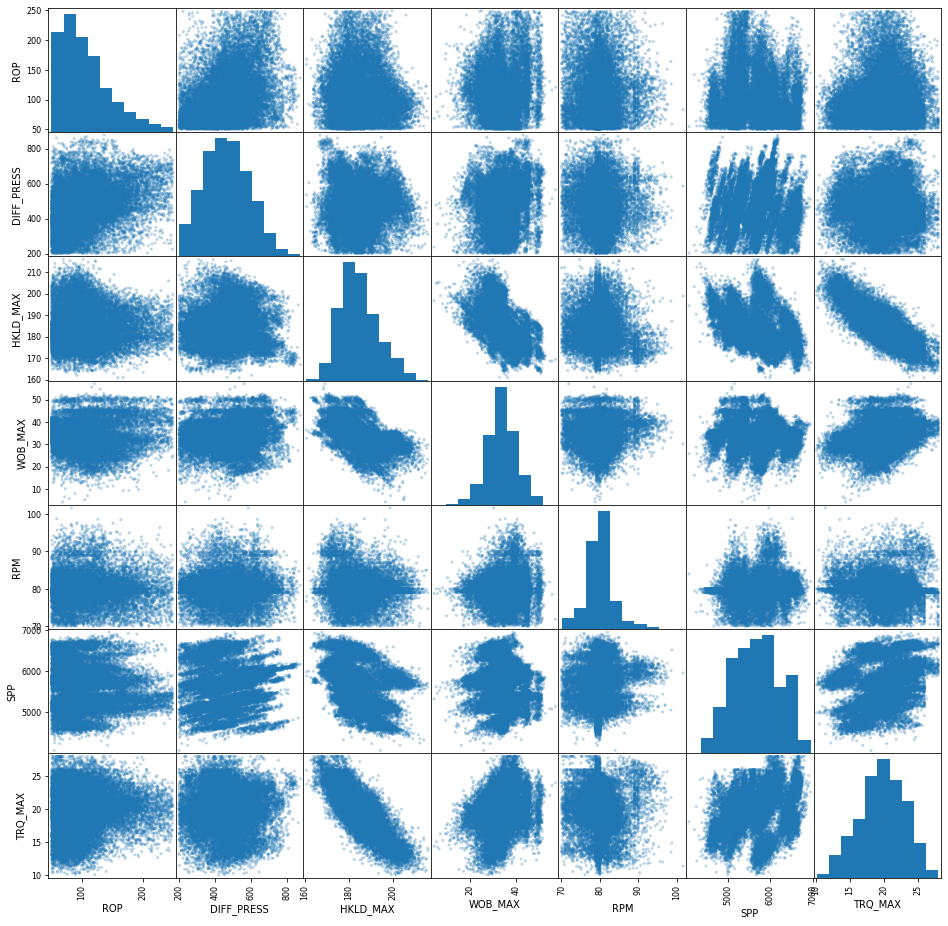

In [19]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = df4.columns
scatter_matrix(df4[attributes], figsize = (16,16), alpha = 0.3)
plt.show()

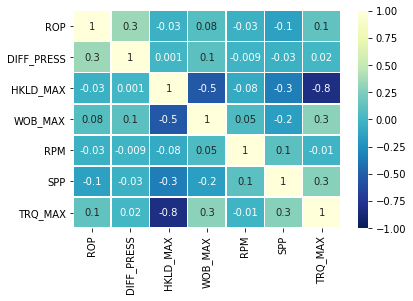

In [20]:
import seaborn as sns
sns.heatmap(df4.corr(),
            annot = True,
            fmt = '.1g',
            vmin = -1,
            vmax = 1,
           linewidth = .5,
           cmap = 
        'YlGnBu_r')

In [71]:
#input of polynomial features
from sklearn.preprocessing import PolynomialFeatures as pf

Poly_x = pf(interaction_only = True, degree = 2)
X_poly = Poly_x.fit_transform(df4[df4.columns[1:7]])

In [72]:
len(X_poly)

21819

from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X_data, y_target)

In [73]:
#train test split with polynomial features
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X_poly, y_target)

In [74]:
len(X_test)

5455

In [75]:
from sklearn.preprocessing import StandardScaler

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [41]:
X_train.shape

(13091, 22)

In [80]:
def build_model(n_hidden = 3, n_neurons = 100, learning_rate = 1e-3, input_shape = [22,]):
    #create the model
    model_tune = keras.models.Sequential()
    model_tune.add(keras.layers.InputLayer(input_shape = input_shape))
    for layer in range(n_hidden):
        model_tune.add(keras.layers.Dense(n_neurons, activation = 'relu'))
    model_tune.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)
    loss = tf.keras.losses.Huber(delta=.08925,reduction="auto",
                                           name="huber_loss")
    #accuracy = tf.keras.accuracy.MeanSquaredError()
    
    #compile the model
    model_tune.compile(loss = loss,
                       optimizer = optimizer,
                      #accuracy = accuracy
                      )
    return model_tune

'''
No need to run this modell  This is an example of building a model 
in a Sci-Kit Learn Wrapper and will not be used for this project.  
It uses the functionality of Sci-Kit Learn.
'''
#creates the model
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

keras_reg.fit(X_train, y_train, epochs = 300,
             validation_data = (X_valid, y_valid),
callbacks = [keras.callbacks.EarlyStopping(patience = 70)])

mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

In [81]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden': [0,1,2,3],
    'n_neurons': np.arange(1,100),
    'learning_rate': reciprocal(1e-3, 1e-2)
}

In [82]:
#Builds the model
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

#Executes Randomized Search with CV
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter = 10, cv = 3)
rnd_search_cv.fit(X_train, y_train, epochs = 300,
                 validation_data = (X_valid, y_valid),
                 callbacks = [keras.callbacks.EarlyStopping(patience = 70)])

Epoch 1/300
273/273 [==============================] - 0s 2ms/step - loss: 9.0630 - val_loss: 7.3201
Epoch 2/300
273/273 [==============================] - 0s 1ms/step - loss: 4.9181 - val_loss: 4.0432
Epoch 3/300
273/273 [==============================] - 0s 1ms/step - loss: 3.6257 - val_loss: 3.2755
Epoch 4/300
273/273 [==============================] - 0s 1ms/step - loss: 3.0105 - val_loss: 2.8893
Epoch 5/300
273/273 [==============================] - 0s 1ms/step - loss: 2.7529 - val_loss: 2.7281
Epoch 6/300
273/273 [==============================] - 0s 1ms/step - loss: 2.6552 - val_loss: 2.6612
Epoch 7/300
273/273 [==============================] - 0s 1ms/step - loss: 2.5986 - val_loss: 2.6043
Epoch 8/300
256/273 [===========================>..] - ETA: 0s - loss: 2.5557

KeyboardInterrupt: 

In [31]:
'''
The search paramaters used a delta of 0.1
'''
rnd_search_cv.best_params_

{'learning_rate': 0.0015189447590670561, 'n_hidden': 3, 'n_neurons': 60}

In [46]:
'''
These search parameters used a delta of 0.08295
'''
rnd_search_cv.best_params_

{'learning_rate': 0.004271110421800102, 'n_hidden': 3, 'n_neurons': 35}

In [44]:
#Model parameters with optimized hyperparameters
# 1 input layer, 3 hidden layers, 35 neurons ea.
input_ = keras.layers.Input(shape = (22,))#22 features with polynomial feats
hidden1 = keras.layers.Dense(35, activation = 'relu')(input_)
hidden2 = keras.layers.Dense(35, activation = 'relu')(hidden1)
hidden3 = keras.layers.Dense(35, activation = 'relu')(hidden2)

# single output layer for continuous variable output
output = keras.layers.Dense(1)(hidden3)
model = keras.Model(inputs = [input_], outputs = [output])

In [45]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 22)]              0         
_________________________________________________________________
dense (Dense)                (None, 35)                805       
_________________________________________________________________
dense_1 (Dense)              (None, 35)                1260      
_________________________________________________________________
dense_2 (Dense)              (None, 35)                1260      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 36        
Total params: 3,361
Trainable params: 3,361
Non-trainable params: 0
_________________________________________________________________


In [46]:
#description of the layers in memory
model.layers

In [47]:
hidden1 = model.layers[1]

In [48]:
weights, biases = hidden1.get_weights()

In [49]:
weights.shape, biases.shape

((22, 35), (35,))

In [53]:
#compiling the tuned model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0042),
              loss = tf.keras.losses.Huber(delta=0.08925,
                                           reduction="auto",
                                           name="huber_loss"),
            )

In [54]:
#callback for early stopping
early_stopping_cb =  keras.callbacks.EarlyStopping(patience = 70)

#callback for checkpoints
checkpoint_cb = keras.callbacks.ModelCheckpoint('/Users/isaacshareef/Desktop/Python_Code\
/Jupyter_Notebook/Notebooks/In progress/PDD_Model.h5',
                                              save_best_only = True)

import os
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

#tensorboard callback
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [55]:
history = model.fit(X_train, y_train, epochs = 500,
                   validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb,
                                checkpoint_cb,
                               tensorboard_cb])

Epoch 1/500
410/410 [==============================] - 1s 2ms/step - loss: 3.1859 - val_loss: 2.5060
Epoch 2/500
410/410 [==============================] - 1s 1ms/step - loss: 2.4182 - val_loss: 2.4002
Epoch 3/500
410/410 [==============================] - 1s 1ms/step - loss: 2.3183 - val_loss: 2.2689
Epoch 4/500
410/410 [==============================] - 1s 1ms/step - loss: 2.2712 - val_loss: 2.2536
Epoch 5/500
410/410 [==============================] - 1s 1ms/step - loss: 2.2211 - val_loss: 2.2347
Epoch 6/500
410/410 [==============================] - 1s 1ms/step - loss: 2.1914 - val_loss: 2.2784
Epoch 7/500
410/410 [==============================] - 1s 1ms/step - loss: 2.1652 - val_loss: 2.2109
Epoch 8/500
410/410 [==============================] - 1s 2ms/step - loss: 2.1547 - val_loss: 2.1572
Epoch 9/500
410/410 [==============================] - 1s 1ms/step - loss: 2.1196 - val_loss: 2.0851
Epoch 10/500
410/410 [==============================] - 1s 1ms/step - loss: 2.0904 - val_lo

410/410 [==============================] - 0s 1ms/step - loss: 1.5916 - val_loss: 1.7887
Epoch 161/500
410/410 [==============================] - 0s 1ms/step - loss: 1.5983 - val_loss: 1.7919
Epoch 162/500
410/410 [==============================] - 0s 1ms/step - loss: 1.5943 - val_loss: 1.7269
Epoch 163/500
410/410 [==============================] - 0s 1ms/step - loss: 1.5894 - val_loss: 1.7489
Epoch 164/500
410/410 [==============================] - 0s 1ms/step - loss: 1.5996 - val_loss: 1.7513
Epoch 165/500
410/410 [==============================] - 0s 1ms/step - loss: 1.5947 - val_loss: 1.7263
Epoch 166/500
410/410 [==============================] - 0s 1ms/step - loss: 1.5909 - val_loss: 1.7479
Epoch 167/500
410/410 [==============================] - 0s 1ms/step - loss: 1.5898 - val_loss: 1.7847
Epoch 168/500
410/410 [==============================] - 0s 1ms/step - loss: 1.5931 - val_loss: 1.7560
Epoch 169/500
410/410 [==============================] - 0s 1ms/step - loss: 1.5955 - v

410/410 [==============================] - 1s 1ms/step - loss: 1.5121 - val_loss: 1.7554


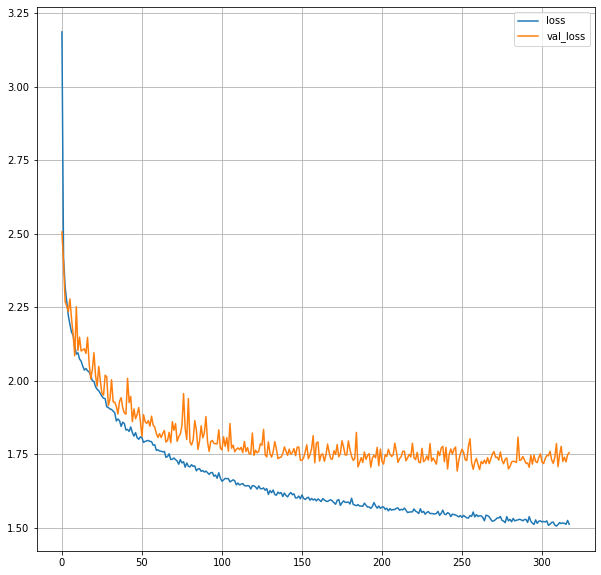

In [56]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (10,10))
plt.grid(True)
#plt.gca().set_ylim(0,1)
plt.show()

In [63]:
X_new = X_test[10:15]

In [64]:
y_pred = model.predict(X_new)

In [65]:
y_pred

array([[ 99.00429 ],
       [114.67736 ],
       [122.705925],
       [ 62.36196 ],
       [ 79.54029 ]], dtype=float32)

In [62]:
y_test[10:15]

3822     102.14
907      136.58
3380      73.39
2327      57.37
12717     96.87
Name: ROP, dtype: float64

In [66]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006